In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import zscore, f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import glob

In [5]:
df = pd.read_csv('/Users/owlxshri/Desktop/coral reef/mlpr-project/finaldata/enso_conv.csv')

# 1. Data Inspection & Cleaning
print("Initial Data Inspection:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Initial Data Inspection:
Shape: (1672, 4)

First 5 rows:
   Day     Month  Year     Value
0   18   October  1992  0.315273
1   26   October  1992  0.311238
2    2  November  1992  0.375543
3    9  November  1992  0.527112
4   15  November  1992  0.634374

Missing Values:
Day      0
Month    0
Year     0
Value    0
dtype: int64


In [6]:
# Convert to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), format='%Y-%B-%d')
print(f"\nDate Range: {df['Date'].min()} to {df['Date'].max()}")


Date Range: 1992-10-18 00:00:00 to 2025-01-12 00:00:00


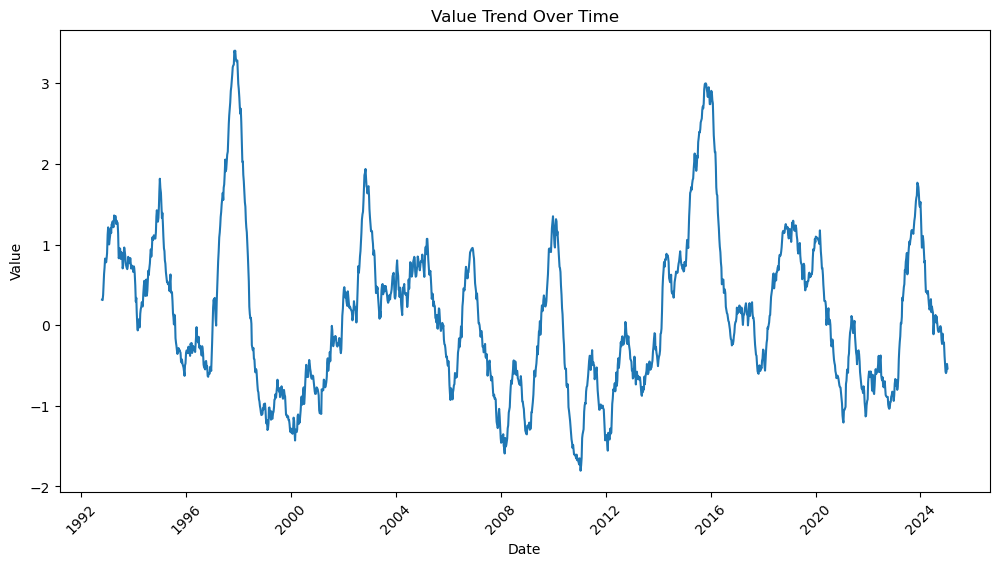

In [7]:
# 2. Temporal Analysis
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Value', data=df)
plt.title('Value Trend Over Time')
plt.xticks(rotation=45)
plt.show()

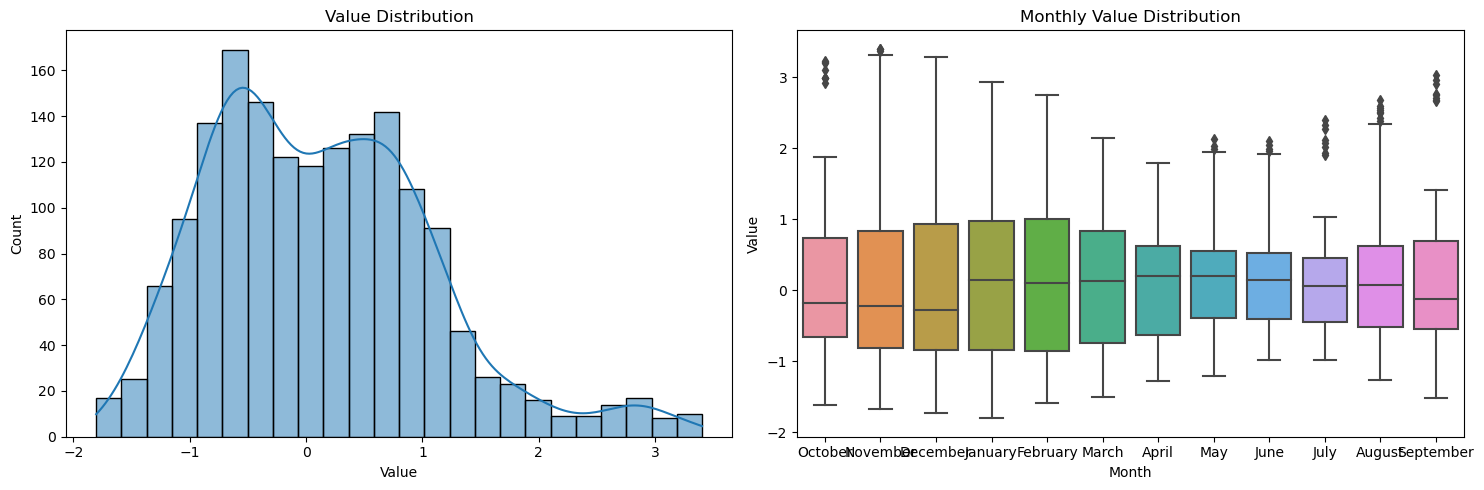

In [8]:
# 3. Distribution Analysis
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df['Value'], kde=True, ax=ax[0])
ax[0].set_title('Value Distribution')
sns.boxplot(x=df['Month'], y=df['Value'], ax=ax[1])
ax[1].set_title('Monthly Value Distribution')
plt.tight_layout()
plt.show()

In [9]:
# 4. Outlier Detection
print("\nOutlier Analysis:")
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR Range: {Q1 - 1.5*IQR:.3f} to {Q3 + 1.5*IQR:.3f}")
print("Potential Outliers:\n", df[(df['Value'] < (Q1 - 1.5*IQR)) | (df['Value'] > (Q3 + 1.5*IQR))])


Outlier Analysis:
IQR Range: -2.623 to 2.745
Potential Outliers:
       Day      Month  Year     Value       Date
254     7  September  1997  2.760850 1997-09-07
255    15  September  1997  2.905770 1997-09-15
256    22  September  1997  2.957678 1997-09-22
257    29  September  1997  3.029172 1997-09-29
258     5    October  1997  3.105771 1997-10-05
259    12    October  1997  3.198867 1997-10-12
260    19    October  1997  3.220213 1997-10-19
261    27    October  1997  3.230082 1997-10-27
262     3   November  1997  3.402480 1997-11-03
263     9   November  1997  3.378386 1997-11-09
264    16   November  1997  3.403260 1997-11-16
265    23   November  1997  3.313290 1997-11-23
266     1   December  1997  3.272617 1997-12-01
267     8   December  1997  3.274315 1997-12-08
268    15   December  1997  3.282396 1997-12-15
269    21   December  1997  3.147514 1997-12-21
270    28   December  1997  2.993136 1997-12-28
271     4    January  1998  2.928756 1998-01-04
272    12    January 

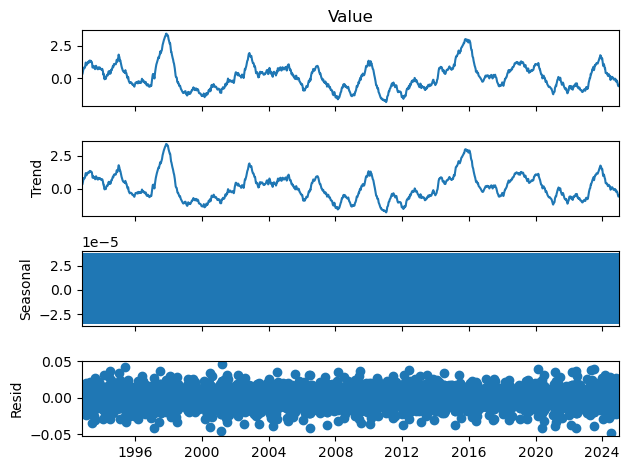

In [10]:
# 5. Time Series Decomposition
df = df.set_index('Date').asfreq('D')  # Set daily frequency
result = seasonal_decompose(df['Value'].interpolate(), model='additive', period=7)  # Weekly seasonality
result.plot()
plt.tight_layout()
plt.show()

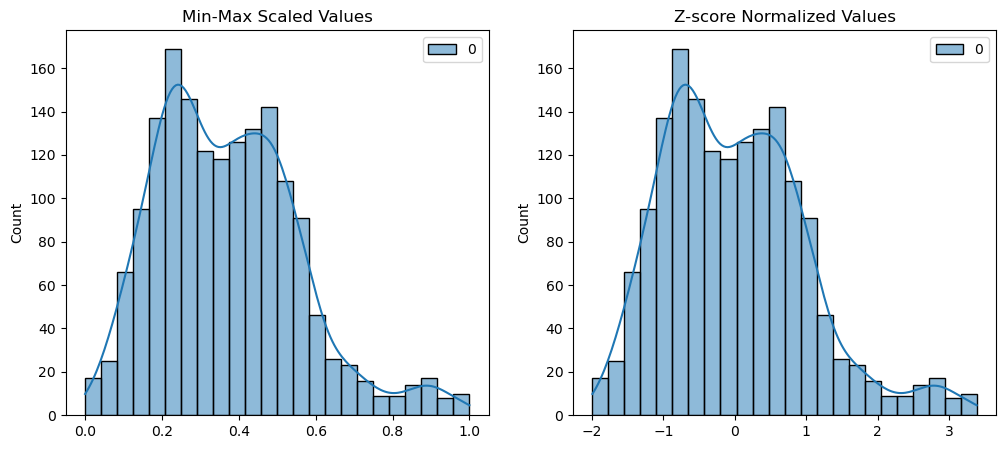

In [20]:
#Normalization Check
scaler = MinMaxScaler()
standard_scaler = StandardScaler()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(scaler.fit_transform(df[['Value']]), kde=True)
plt.title('Min-Max Scaled Values')

plt.subplot(1,2,2)
sns.histplot(standard_scaler.fit_transform(df[['Value']]), kde=True)
plt.title('Z-score Normalized Values')
plt.show()